In [3]:
# import useful libraries first
import math
import numpy as np
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

# define the file path for the text file of interest - yours will be different
path = "data/wnat.txt"

# open the text file and start reading the lines in
f = open(path,'r')

# Since we want to get transitions we should take this time to get rid of extraneous data.
# how to show what we have in the dictionary



chars = []
for line in f:
    # i want to make all of the letters lowercase for funsies, also less characters to mess with
    
    lowers = [unicode(a.lower(),errors='ignore') for a in line]
    # extend method adds all of this to a single list list
    chars.extend(lowers)
    
print(chars)
# now that I have all of the data in file I can close it 
f.close() # its just good form to close the file after use






IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
# Now that we have all of the data it is a good idea to get a running count of everything. 
# we could take some time to wirte a ton of code for this, or we can just use the counter method
char_counts = Counter(chars)
        
# so one thing is that since there is a lot of new line and space characters, it will skew our model so 
# lets weight them so that they appear to occur less
#char_counts['\n'] = int(round(char_counts['\n']/2))
#char_counts[' '] = int(round(char_counts[' ']/100))

# how to show what we have in the dictionary
print(char_counts.keys().index('a'))
for k,v in char_counts.iteritems():
    print(k,v)


27
(u'', 3500)
(u'\n', 46197)
(u'!', 8)
(u' ', 362289)
(u'&', 6)
(u')', 99)
(u'(', 91)
(u'-', 1149)
(u',', 30130)
(u'/', 4)
(u'.', 16384)
(u'1', 4639)
(u'0', 1702)
(u'3', 2192)
(u'2', 2438)
(u'5', 1921)
(u'4', 2103)
(u'7', 1975)
(u'6', 2047)
(u'9', 1511)
(u'8', 1662)
(u';', 1953)
(u':', 165)
(u'?', 27)
(u'@', 2)
(u'[', 2142)
(u']', 2142)
(u'a', 136393)
(u'c', 58562)
(u'b', 28283)
(u'e', 232349)
(u'd', 62097)
(u'g', 28938)
(u'f', 50459)
(u'i', 121922)
(u'h', 104038)
(u'k', 6207)
(u'j', 1314)
(u'm', 46405)
(u'l', 63651)
(u'o', 146503)
(u'n', 126908)
(u'q', 3240)
(u'p', 42194)
(u's', 105010)
(u'r', 117739)
(u'u', 53402)
(u't', 178913)
(u'w', 28853)
(u'v', 19599)
(u'y', 33792)
(u'x', 5416)
(u'z', 316)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52]


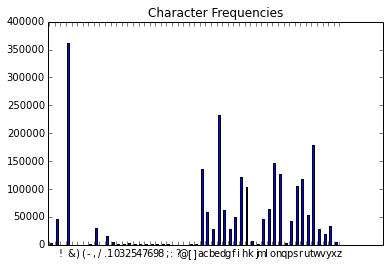

In [5]:

# so we want a histogram of all the frequencies of the characters. What is a histogram but a fancy barplot. 
# we will use the bar plot method here because histogram has you define bins, so it works better for numeric data. 
# we could change all the characters to ascii numbers then do a histogram that way, but since the concept of a bin implies
# character overlap, we dont want to do that. Hence bar plot

x= np.arange(len(char_counts))
print(x) # show the numpy array we made
width = 0.35

# make a bar plot
fig,ax = plt.subplots()

ax.bar(x + width,char_counts.values(), width)
ax.set_xticks(x + width/2)
ax.set_xticklabels(tuple(char_counts.keys()))
ax.set_title('Character Frequencies')
plt.show()


In [6]:
# now we need to do the same for the transitions. To get this we can either count the number of occurences of every possible
# character transition, or just the ones that appear in this text. Lets go with just the ones that appear in the text.
# although if you want you can do permutaions of pairs of characters in the set that matches our dictionary keys. 

# so we make a list of pairs of data
ch_pairs = [chars[i]+chars[i+1] for i in range(len(chars)-1)]
#print(ch_pairs)

#get the frequencies of each transition
ch_pairs_counts = Counter(ch_pairs)
print(len(ch_pairs_counts))
for k,v in ch_pairs_counts.iteritems():
    print(k,v)



1139
(u'', 2323)
(u' c', 18138)
(u'gu', 705)
(u' a', 37187)
(u' f', 11623)
(u' g', 7092)
(u' d', 7997)
(u' e', 12028)
(u' j', 530)
(u' k', 904)
(u' h', 10666)
(u' i', 27181)
(u' n', 8326)
(u' o', 35987)
(u' l', 7365)
(u' m', 13894)
(u' r', 7570)
(u' s', 19864)
(u' p', 18575)
(u':/', 2)
(u' v', 2755)
(u' w', 18984)
(u' t', 67025)
(u' u', 3948)
(u'go', 2261)
(u'gn', 956)
(u' x', 11)
(u' y', 1135)
(u'gi', 1212)
(u'gh', 3272)
(u'-e', 62)
(u' ', 174)
(u'-g', 24)
(u'-f', 133)
(u'-a', 86)
(u':\n', 23)
(u'ty', 4246)
(u'-m', 65)
(u'tw', 1358)
(u'tt', 1522)
(u'tu', 3498)
(u'tr', 5877)
(u'ts', 4616)
(u'tp', 37)
(u'-j', 3)
(u'tn', 77)
(u'to', 15732)
(u'tl', 2008)
(u'tm', 59)
(u'av', 3368)
(u'-p', 30)
(u'th', 64349)
(u'ti', 15566)
(u'tf', 49)
(u' [', 74)
(u'td', 1)
(u'te', 12620)
(u'tb', 2)
(u'tc', 340)
(u'ta', 8287)
(u'  ', 1)
(u' &', 6)
(u'g2', 1)
(u'g1', 1)
(u'c\n', 43)
(u': ', 140)
(u' (', 88)
(u' .', 1181)
(u'g:', 1)
(u' ,', 15)
(u'-\n', 84)
(u' 2', 462)
(u' 3', 370)
(u' 0', 38)
(u' 1', 1165)


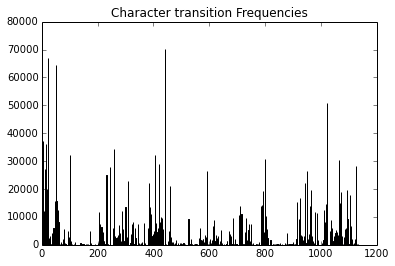

In [7]:
x2= np.arange(len(ch_pairs_counts))
#print(x2) # show the numpy array we made
width = 0.35

# make a bar plot
fig2,ax2 = plt.subplots()

ax2.bar(x2 + width,ch_pairs_counts.values(), width)
#ax2.set_xticks(x2 + width/2)
#ax2.set_xticklabels(tuple(ch_pairs_counts.keys()))
ax2.set_title('Character transition Frequencies')
plt.show()

# so there are 862 of these, you are going to want to play with the rectangle widths and tick marks


In [8]:
# so now we need to create a markov chain. well the probability that a given transition occurs is the number of transitions 
# observed in each case divided by the total number of observations.
obs   = sum(ch_pairs_counts.values())

# we need to have a parameter map for this stuff so we know what probabilities map to what  
param_map = np.array([[ch0+ch1 for ch0 in char_counts.keys()] for ch1 in char_counts.keys()])

# for demonstration purposes the next line shows the counts and not probabilities
param_grid = np.array([[ch_pairs_counts[ch0+ch1] for ch0 in char_counts.keys()] for ch1 in char_counts.keys()])

probs = np.matrix(param_grid/obs)

np.set_printoptions(threshold=np.nan)
print(param_map[0,:])  # change the 0 to some other number to know what row we have
print(param_grid[0,:])
print(probs[0,:])
print(param_map.shape)
print(probs.shape)
print(probs.argmax())


[u'' u'\n' u'!' u' ' u'&' u')' u'(' u'-' u',' u'/' u'.' u'1' u'0' u'3' u'2'
 u'5' u'4' u'7' u'6' u'9' u'8' u';' u':' u'?' u'@' u'[' u']' u'a' u'c' u'b'
 u'e' u'd' u'g' u'f' u'i' u'h' u'k' u'j' u'm' u'l' u'o' u'n' u'q' u'p' u's'
 u'r' u'u' u't' u'w' u'v' u'y' u'x' u'z']
[2323 1496    0  174    0    0    0    0   13    0   33    0    0    0    0
    0    0    0    1    0    0    2    0    0    0    1    1    6   14    6
    8   12   21    0    8    7    1    0    7    9    4   48    0    2  323
  103    1   16    4    2   31    0    0]
[[  1.01397655e-03   6.52995661e-04   0.00000000e+00   7.59500301e-05
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    5.67442754e-06   0.00000000e+00   1.44043161e-05   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   4.36494426e-07   0.00000000e+00
    0.00000000e+00   8.72988852e-07   0.00000000e+00   0.00000000e+00
    0.00000000e+00   4.36494426e-07   4.

In [11]:
# so now we need to iteratively create a file using the transition probabilities. so we need an initial vector 
# that describes the state. so in the initial file we make there is a 0% chance of having any cha

NN = len(char_counts)
# create an initial statevector 
s0 =np.zeros((1,NN))
s0[0,40]=1 # initial state
print(s0.shape,s0)



((1, 53), array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.]]))


In [20]:
# so the last result wasn't very interesting. however, the assigmnet wants us to do this 5000 times or so. so lets try that 
s0 =np.zeros((1,NN))
s0[0,-25]=1 # initial state
for i in range(1000):
    if i ==0:
        si = np.dot(np.mat(s0),np.mat(probs))
    else:
        si = np.dot(np.mat(si),np.mat(probs))
    print(si.shape)
    # now to avoid exploding or diminishing values it is adviseable to use a signmoid function here. 
    #si = 1/np.exp(1+np.exp(-si))
    indi  = np.argmax(si)
    
    print(si)
    print('argmax index: {}'.format(indi))
    print('character is: ',char_counts.keys()[indi],'--')
    si =np.zeros((1,NN))
    si[0,indi]=1 
    #print(si)
    
    # markov models are subject to looping poinst where we cant get to other states

(1, 53)
[[  6.11092196e-06   6.31170940e-04   0.00000000e+00   7.91713590e-03
    8.72988852e-07   0.00000000e+00   1.74597770e-06   2.35706990e-05
    0.00000000e+00   0.00000000e+00   3.92844983e-06   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.91664702e-03
    8.65568447e-04   0.00000000e+00   2.23354198e-03   1.30948328e-06
    0.00000000e+00   4.36494426e-07   4.50505897e-03   1.30948328e-06
    4.36494426e-07   0.00000000e+00   0.00000000e+00   1.39678216e-05
    8.58148041e-04   2.61940305e-03   0.00000000e+00   0.00000000e+00
    4.97603646e-04   1.06330042e-03   1.88434644e-03   1.48408105e-04
    1.74597770e-06   0.00000000e+00   8.72988852e-07   3.65345835e-04
    0.00000000e+00]]
argmax index: 3
('character is: ', u' ', '--')
(1, 53)
[[  7.

    7.07120970e-05]]
argmax index: 35
('character is: ', u'h', '--')
(1, 53)
[[  3.05546098e-06   3.40029158e-04   0.00000000e+00   4.65564955e-03
    0.00000000e+00   0.00000000e+00   4.36494426e-07   2.31342046e-05
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   5.67442754e-06
    4.64124523e-03   3.05546098e-06   6.80931305e-05   0.00000000e+00
    1.42820976e-03   4.36494426e-07   3.92844983e-06   4.36494426e-07
    6.54741639e-06   0.00000000e+00   2.61896656e-06   1.74597770e-06
    7.72595134e-05   1.11306079e-04   0.00000000e+00   1.04322168e-04
    1.41380545e-03   2.36579979e-04   0.00000000e+00   2.80879798e-02
    4.18816402e-03   0.00000000e+00   1.74597770e-06   9.60287737e-06
    0.0000000

[[  7.59500301e-05   0.00000000e+00   2.18247213e-06   4.36494426e-07
    1.74597770e-06   2.61896656e-05   0.00000000e+00   1.04758662e-05
    1.21650997e-02   0.00000000e+00   4.92278414e-03   1.22218439e-04
    9.55922793e-05   9.95207291e-05   1.10869584e-04   7.90054911e-05
    9.16638295e-05   7.02756026e-05   7.59500301e-05   7.20215803e-05
    6.89661193e-05   7.86999450e-04   6.11092196e-05   8.29339409e-06
    0.00000000e+00   6.35972379e-04   6.11092196e-06   2.92320317e-03
    2.07334852e-04   1.65867882e-05   3.06523846e-02   1.15710307e-02
    2.47841535e-03   1.08543069e-02   1.65867882e-04   5.17289544e-03
    5.42999066e-04   0.00000000e+00   2.12791033e-03   3.46271028e-03
    6.76653659e-03   1.23794184e-02   0.00000000e+00   2.17374224e-04
    1.50071149e-02   9.17336686e-03   4.40859370e-05   1.40031777e-02
    5.40816594e-04   1.74597770e-06   1.00184201e-02   2.36579979e-04
    4.80143869e-06]]
argmax index: 30
('character is: ', u'e', '--')
(1, 53)
[[  3.4919554

[[  6.98391082e-06   2.65694157e-03   0.00000000e+00   2.92560389e-02
    0.00000000e+00   0.00000000e+00   6.98391082e-06   9.47192904e-05
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.72988852e-07
    2.18247213e-06   3.05546098e-06   2.61896656e-06   1.52773049e-05
    9.60287737e-06   2.18247213e-06   2.61896656e-06   3.92844983e-06
    5.23793311e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.28553719e-03
    1.98343067e-03   1.78089726e-04   2.15148103e-03   8.29339409e-06
    1.78962715e-05   3.22569381e-04   8.40731914e-03   7.17160342e-04
    0.00000000e+00   0.00000000e+00   4.36494426e-07   1.04496766e-03
    2.81626204e-03   7.74384761e-03   0.00000000e+00   4.74469441e-04
    5.30602624e-03   3.36013409e-03   2.16763132e-03   6.64344516e-04
    1.48408105e-05   0.00000000e+00   4.67049036e-05   3.16021964e-04
    0.00000000e+00]]
argmax index: 3
('character is: ', u' ', '--')
(1, 53)
[[  7.59500301

argmax index: 47
('character is: ', u't', '--')
(1, 53)
[[  6.98391082e-06   2.65694157e-03   0.00000000e+00   2.92560389e-02
    0.00000000e+00   0.00000000e+00   6.98391082e-06   9.47192904e-05
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.72988852e-07
    2.18247213e-06   3.05546098e-06   2.61896656e-06   1.52773049e-05
    9.60287737e-06   2.18247213e-06   2.61896656e-06   3.92844983e-06
    5.23793311e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.28553719e-03
    1.98343067e-03   1.78089726e-04   2.15148103e-03   8.29339409e-06
    1.78962715e-05   3.22569381e-04   8.40731914e-03   7.17160342e-04
    0.00000000e+00   0.00000000e+00   4.36494426e-07   1.04496766e-03
    2.81626204e-03   7.74384761e-03   0.00000000e+00   4.74469441e-04
    5.30602624e-03   3.36013409e-03   2.16763132e-03   6.64344516e-04
    1.48408105e-05   0.00000000e+00   4.67049036e-05   3.16021964e-04
    0.00000000e+00]]
argmax index:

    4.80143869e-06]]
argmax index: 30
('character is: ', u'e', '--')
(1, 53)
[[  3.49195541e-06   4.20344132e-04   0.00000000e+00   5.25015496e-03
    0.00000000e+00   0.00000000e+00   8.72988852e-07   2.70626544e-05
    0.00000000e+00   0.00000000e+00   4.07249299e-04   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.29339409e-06
    4.80318466e-03   4.09519070e-03   2.12398188e-03   3.88305441e-03
    2.15671896e-03   1.28111114e-03   2.50678749e-03   2.21237200e-02
    1.04365817e-03   2.30469057e-04   5.13972187e-03   3.93412426e-03
    1.63685410e-04   3.94503662e-03   0.00000000e+00   3.21390846e-03
    5.85469974e-03   1.26277837e-02   1.28067465e-03   5.50855966e-03
    2.13838619e-03   6.08647828e-03   7.48587941e-04   3.43957608e-04
    7.0712097

(1, 53)
[[  7.59500301e-05   0.00000000e+00   2.18247213e-06   4.36494426e-07
    1.74597770e-06   2.61896656e-05   0.00000000e+00   1.04758662e-05
    1.21650997e-02   0.00000000e+00   4.92278414e-03   1.22218439e-04
    9.55922793e-05   9.95207291e-05   1.10869584e-04   7.90054911e-05
    9.16638295e-05   7.02756026e-05   7.59500301e-05   7.20215803e-05
    6.89661193e-05   7.86999450e-04   6.11092196e-05   8.29339409e-06
    0.00000000e+00   6.35972379e-04   6.11092196e-06   2.92320317e-03
    2.07334852e-04   1.65867882e-05   3.06523846e-02   1.15710307e-02
    2.47841535e-03   1.08543069e-02   1.65867882e-04   5.17289544e-03
    5.42999066e-04   0.00000000e+00   2.12791033e-03   3.46271028e-03
    6.76653659e-03   1.23794184e-02   0.00000000e+00   2.17374224e-04
    1.50071149e-02   9.17336686e-03   4.40859370e-05   1.40031777e-02
    5.40816594e-04   1.74597770e-06   1.00184201e-02   2.36579979e-04
    4.80143869e-06]]
argmax index: 30
('character is: ', u'e', '--')
(1, 53)
[[  3

argmax index: 47
('character is: ', u't', '--')
(1, 53)
[[  6.98391082e-06   2.65694157e-03   0.00000000e+00   2.92560389e-02
    0.00000000e+00   0.00000000e+00   6.98391082e-06   9.47192904e-05
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.72988852e-07
    2.18247213e-06   3.05546098e-06   2.61896656e-06   1.52773049e-05
    9.60287737e-06   2.18247213e-06   2.61896656e-06   3.92844983e-06
    5.23793311e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.28553719e-03
    1.98343067e-03   1.78089726e-04   2.15148103e-03   8.29339409e-06
    1.78962715e-05   3.22569381e-04   8.40731914e-03   7.17160342e-04
    0.00000000e+00   0.00000000e+00   4.36494426e-07   1.04496766e-03
    2.81626204e-03   7.74384761e-03   0.00000000e+00   4.74469441e-04
    5.30602624e-03   3.36013409e-03   2.16763132e-03   6.64344516e-04
    1.48408105e-05   0.00000000e+00   4.67049036e-05   3.16021964e-04
    0.00000000e+00]]
argmax index:

(1, 53)
[[  3.49195541e-06   4.20344132e-04   0.00000000e+00   5.25015496e-03
    0.00000000e+00   0.00000000e+00   8.72988852e-07   2.70626544e-05
    0.00000000e+00   0.00000000e+00   4.07249299e-04   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   8.29339409e-06
    4.80318466e-03   4.09519070e-03   2.12398188e-03   3.88305441e-03
    2.15671896e-03   1.28111114e-03   2.50678749e-03   2.21237200e-02
    1.04365817e-03   2.30469057e-04   5.13972187e-03   3.93412426e-03
    1.63685410e-04   3.94503662e-03   0.00000000e+00   3.21390846e-03
    5.85469974e-03   1.26277837e-02   1.28067465e-03   5.50855966e-03
    2.13838619e-03   6.08647828e-03   7.48587941e-04   3.43957608e-04
    7.07120970e-05]]
argmax index: 35
('character is: ', u'h', '--')
(1, 53)
[[  3

    7.07120970e-05]]
argmax index: 35
('character is: ', u'h', '--')
(1, 53)
[[  3.05546098e-06   3.40029158e-04   0.00000000e+00   4.65564955e-03
    0.00000000e+00   0.00000000e+00   4.36494426e-07   2.31342046e-05
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   5.67442754e-06
    4.64124523e-03   3.05546098e-06   6.80931305e-05   0.00000000e+00
    1.42820976e-03   4.36494426e-07   3.92844983e-06   4.36494426e-07
    6.54741639e-06   0.00000000e+00   2.61896656e-06   1.74597770e-06
    7.72595134e-05   1.11306079e-04   0.00000000e+00   1.04322168e-04
    1.41380545e-03   2.36579979e-04   0.00000000e+00   2.80879798e-02
    4.18816402e-03   0.00000000e+00   1.74597770e-06   9.60287737e-06
    0.0000000

    7.07120970e-05]]
argmax index: 35
('character is: ', u'h', '--')
(1, 53)
[[  3.05546098e-06   3.40029158e-04   0.00000000e+00   4.65564955e-03
    0.00000000e+00   0.00000000e+00   4.36494426e-07   2.31342046e-05
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   5.67442754e-06
    4.64124523e-03   3.05546098e-06   6.80931305e-05   0.00000000e+00
    1.42820976e-03   4.36494426e-07   3.92844983e-06   4.36494426e-07
    6.54741639e-06   0.00000000e+00   2.61896656e-06   1.74597770e-06
    7.72595134e-05   1.11306079e-04   0.00000000e+00   1.04322168e-04
    1.41380545e-03   2.36579979e-04   0.00000000e+00   2.80879798e-02
    4.18816402e-03   0.00000000e+00   1.74597770e-06   9.60287737e-06
    0.0000000